In [1]:
# import lib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2012 = pd.read_csv('2012_Data.csv', encoding='latin1', low_memory=False)
df_2013 = pd.read_csv('2013_Data.csv', encoding='latin1', low_memory=False)

In [3]:
# Concatenate the two DataFrames
merged_data = pd.concat([df_2012, df_2013], ignore_index=True)

# Display the first few rows of the merged data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   fiscal_year               int64  
 2   fiscal_month              int64  
 3   calendar_year             int64  
 4   calendar_month            int64  
 5   calendar_day              int64  
 6   company_code              int64  
 7   customer_code             object 
 8   customer_district_code    int64  
 9   item_code                 object 
 10  business_area_code        object 
 11  item_group_code           object 
 12  item_class_code           object 
 13  item_type                 int64  
 14  bonus_group_code          object 
 15  environment_group_code    object 
 16  technology_group_code     object 
 17  commission_group_code     object 
 18  reporting_classification  object 
 19  light_source              object 
 20  warehouse_code          

# Data Cleaning

1. Handling Missing Values
- Identifying Missing Data: Determine where missing values occur and why (e.g., data entry errors, collection issues).
- Strategies for Handling Missing Data:
    - Removal: Drop rows or columns with excessive missing values if they don’t significantly affect the analysis.
    - Imputation: Replace missing values using techniques like mean, median, mode, or more sophisticated methods (e.g., regression or k-nearest neighbors).
2. Correcting Inconsistent Data
- Fix inconsistencies in data entries (e.g., different formats for the same value, such as "USA" and "United States").
- Standardize formats for dates, phone numbers, and other data types.
3. Removing Duplicates
- Identify and remove duplicate records, which can skew analysis results and lead to incorrect conclusions.
4. Handling Outliers
- Outliers can distort analysis, especially in statistical modeling. Identify them using visualization techniques (e.g., boxplots).
- Decide whether to remove, transform, or keep outliers based on the context and goals of the analysis.
5. Data Type Conversion
- Ensure that each column has the appropriate data type (e.g., numeric, categorical, datetime).
- Convert data types if needed (e.g., parsing date strings into datetime objects).
6. Normalization and Scaling
- Normalization: Rescale numerical data to fit within a particular range, often [0, 1].
- Standardization: Adjust the data to have a mean of zero and a standard deviation of one, which is important for certain machine learning algorithms.
7. Handling Categorical Variables
- Convert categorical variables to numeric form if required for analysis (e.g., one-hot encoding).
- Combine similar categories to reduce complexity (e.g., grouping rare categories together).
8. Feature Engineering
- Creating New Features: Generate new variables based on existing ones to capture additional insights.
- Dropping Irrelevant Features: Remove features that do not add value or are highly correlated, to avoid multicollinearity.
9. Text Cleaning (for Textual Data)
- For textual data, cleaning involves removing punctuation, converting to lowercase, removing stopwords, and stemming or lemmatizing words to bring them to their root form.

## 1. Handling Missing Values
- Identifying Missing Data: Determine where missing values occur and why (e.g., data entry errors, collection issues).
- Strategies for Handling Missing Data:
    - Removal: Drop rows or columns with excessive missing values if they don’t significantly affect the analysis.
    - Imputation: Replace missing values using techniques like mean, median, mode, or more sophisticated methods (e.g., regression or k-nearest neighbors).

In [7]:
# check the length of data and rows.
merged_data.shape

(1988382, 41)

In [8]:
# indentifying the null values.
merged_data.isnull().sum()

accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
order_type_code             

The null values are shown in column 'item_source_class', which is 1,988,382, the same as the normal data length. This means this column does not use, so we decided to remove  it.

In [10]:
# remove null values.
merged_data.drop('item_source_class', axis=1, inplace=True)

In [11]:
# recheck null value after remove
merged_data.isnull().sum()

accounting_date             0
fiscal_year                 0
fiscal_month                0
calendar_year               0
calendar_month              0
calendar_day                0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity              0
value_price_adjustment      0
currency  

We expected that each row in each column would be unique, as each row represents a specific order item from a customer. If there are duplicate rows in any column, it could indicate an issue with data accuracy.

In [13]:
# check the length of data and rows.
merged_data.shape

(1988382, 40)

## 2. Correcting Inconsistent Data
- Fix inconsistencies in data entries (e.g., different formats for the same value, such as "USA" and "United States").
- Standardize formats for dates, phone numbers, and other data types.

First, we want to check whether the accounting date, fiscal year, and calendar year are consistent. However, the accounting date is not in the same standardised format as the others, so we will convert it to match the same format before checking consistency.

In [16]:
# Convert 'accounting_date' to datetime format
merged_data['accounting_date'] = pd.to_datetime(merged_data['accounting_date'], format='%Y%m%d')

# Create separate columns for year, month, and day from the datetime object
merged_data['accounting_year'] = merged_data['accounting_date'].dt.year
merged_data['accounting_month'] = merged_data['accounting_date'].dt.month
merged_data['accounting_day'] = merged_data['accounting_date'].dt.day

# Display the first few rows to verify the results
merged_data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,accounting_year,accounting_month,accounting_day
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,AUD,2217887,1,20120509,2865354,20120509,49:58.7,2012,5,9
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,AUD,2185745,1,20120216,2833515,20120216,49:58.7,2012,2,16
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,AUD,2217807,1,20120509,2864857,20120508,49:58.7,2012,5,9
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,AUD,2222758,1,20120518,2869759,20120518,49:58.7,2012,5,18
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,AUD,2170374,1,20120109,2819189,20120109,49:58.7,2012,1,9


Now, there are new columns: 'accounting_year', 'accounting_month', and 'accounting_day'. We will use these columns to check for consistency.

In [18]:
# Sort and print unique values in ascending order for calendar year, month, and day
print("Calendar Year:", sorted(merged_data['calendar_year'].unique()))
print("Calendar Month:", sorted(merged_data['calendar_month'].unique()))
print("Calendar Day:", sorted(merged_data['calendar_day'].unique()))

print("\n")

# Sort and print unique values in ascending order for accounting year, month, and day
print("Accounting Year:", sorted(merged_data['accounting_year'].unique()))
print("Accounting Month:", sorted(merged_data['accounting_month'].unique()))
print("Accounting Day:", sorted(merged_data['accounting_day'].unique()))


Calendar Year: [2012, 2013]
Calendar Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Calendar Day: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Accounting Year: [2012, 2013]
Accounting Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Accounting Day: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


The results show that the calendar column and the accounting column are consistent. Next, we will check the consistency between the fiscal column and the calendar column.

In [20]:
# Sort and print unique values in ascending order for calendar year and month
print("Calendar Year:", sorted(merged_data['calendar_year'].unique()))
print("Calendar Month:", sorted(merged_data['calendar_month'].unique()))

print("\n")

# Sort and print unique values in ascending order for fiscal year and month
print("Fisical Year:", sorted(merged_data['fiscal_year'].unique()))
print("Fisical Month:", sorted(merged_data['fiscal_month'].unique()))


Calendar Year: [2012, 2013]
Calendar Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Fisical Year: [2012, 2013, 2014]
Fisical Month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


We observed that the fiscal year and month had unique patterns compared to others. Therefore, we examined the number of months within each fiscal year and identified the specific months for each year.

In [22]:
# Group by 'fiscal_year' and list all unique 'fiscal_month' for each year
fiscal_months_per_year = merged_data.groupby('fiscal_year')['fiscal_month'].apply(lambda x: sorted(x.unique()))

# Display the result
print(fiscal_months_per_year)

fiscal_year
2012                      [7, 8, 9, 10, 11, 12]
2013    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014                         [1, 2, 3, 4, 5, 6]
Name: fiscal_month, dtype: object


Upon review, we found that the fiscal year follows the financial calendar in Australia. This means that the fiscal year 2012 includes July to December 2012 and January to June 2013, while the fiscal year 2013 includes July to December 2013 and January to June 2014. In summary, the fiscal year is the same as the calendar and accounting year.

In the next step, we decided to fix inconsistencies in data entries for the following columns: 'order_type_code', 'abc_class_volume', 'abc_class_code', 'warehouse_code', 'environment_group_code', 'business_area_code', 'customer_district_code', and 'technology_group_code'.

- **order_type_code**

In [26]:
# Check unique order type
print(merged_data['order_type_code'].unique())

['NOR' 'EDI' 'CDG' 'PRO' 'NOS' 'CRR' 'EXP' 'EDS' 'CSH' 'PRD' 'CRD' 'NOH'
 'COP' 'OBS' 'MIN' 'COA' 'PSA' 'PPD' 'WDC' 'PMO' 'CPR' 'CRP' 'PM0' 'PGS'
 'SPL' 'AES' 'ZCG' 'ZCR' 'SPC' 'ZOP' 'ZC2' '5TN' 'PUP' 'PPO' 'ZD3' 'CSO'
 'PME']


It shows that 'PME' does not have any list in our document, so we check how many rows show 'PME'

In [28]:
# Filter the DataFrame for rows where 'order_type_code' is 'PME'
pme_rows = merged_data[merged_data['order_type_code'] == 'PME']

# Count the number of rows
pme_count = len(pme_rows)

# Display the count
print(f"Number of rows with 'order_type_code' as 'PME': {pme_count}")

Number of rows with 'order_type_code' as 'PME': 243


It resulted in 243 rows, so we decided to drop them.

In [30]:
# Drop rows where 'order_type_code' is 'PME'
merged_data = merged_data[merged_data['order_type_code'] != 'PME']

# Display the first few rows to confirm
merged_data.shape

(1988139, 43)

- **abc_class_volume**

In [32]:
# Check unique class volume
print(merged_data['abc_class_volume'].unique())

['J' 'U' 'D' 'I' 'C' 'E' 'G' 'B' 'A' 'H']


The results show consistency and a uniform format.

- **abc_class_code**

In [35]:
# Check unique class code
print(merged_data['abc_class_code'].unique())

['J' 'B' 'D' 'E' 'C' 'I' 'A' 'F' 'U' 'G']


The results show consistency and a uniform format.

- **warehouse_code**

In [38]:
# Check unique warehouse code
print(merged_data['warehouse_code'].unique())

['Q1 ' 'V0 ' 'S0 ' 'T0 ' 'Q0 ' 'N0 ' 'KN0' 'W0 ' 'S1 ' 'Unk' 'GS0' 'GN0'
 'CN0' 'CQ0' 'CV0' 'GW0' 'CS0' 'CW0' 'GQ0' 'AS0' 'CT0' 'CS1' 'CN1' 'CZ0'
 'LW0' 'LQ0' 'LS1' 'LV0' 'LN9' 'LS0' 'FWE' 'EN0' 'FW2' 'JT0' 'FA1' 'FWA'
 'FA2' '1N0' '1S0' '5N2' '5V0' '5S0' '5W0' '1V0' '1Q0' '1N1' '1W0' '1Q1'
 '5Q0' '5T0' '5S1' '5N1' '1T0' '1S1' '5Q1' '1T1' 'BB1' '1N2' '1N3']


The results show that there are many warehouse codes, so we need to double-check them against our reference list to identify any discrepancies.

In [40]:
# List of valid warehouse codes from our reference
valid_warehouse_codes = [
    'Q1', 'V0', 'S0', 'T0', 'Q0', 'N0', 'KN0', 'W0', 'S1', 'Unk', 'GS0', 'GN0', 
    'CN0', 'CQ0', 'CV0', 'GW0', 'CS0', 'CW0', 'GQ0', 'AS0', 'CT0', 'CS1', 'CN1', 
    'CZ0', 'LW0', 'LQ0', 'LS1', 'LV0', 'LN9', 'LS0', 'FWE', 'EN0', 'FW2', 'JT0', 
    'FA1', 'FWA', 'FA2', '1N0', '1S0', '5N2', '5V0', '5S0', '5W0', '1V0', '1Q0', 
    '1N1', '1W0', '1Q1', '5Q0', '5T0', '5S1', '5N1', '1T0', '1S1', '5Q1']

# Filter the DataFrame to get only the invalid warehouse codes
invalid_warehouse_data = merged_data[~merged_data['warehouse_code'].isin(valid_warehouse_codes)]

# Group by the invalid warehouse codes and count their occurrences
invalid_code_counts = invalid_warehouse_data['warehouse_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid warehouse codes:")
print(invalid_code_counts)
len(invalid_code_counts)

Counts of invalid warehouse codes:
warehouse_code
V0     40941
N0     30613
Q0     22310
W0     15303
S0     13876
Q1      7843
T0      3478
S1      3451
1T1       97
BB1       95
1N2       14
1N3        9
Name: count, dtype: int64


12

The results show some invalid entries compared to our reference list. However, the codes 'V0', 'N0', 'Q0', 'W0', 'S0', 'Q1', 'T0', and 'S1' are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [42]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_map = {
    'V0 ': 'V0',
    'N0 ': 'N0',
    'Q0 ': 'Q0',
    'W0 ': 'W0',
    'S0 ': 'S0',
    'Q1 ': 'Q1',
    'T0 ': 'T0',
    'S1 ': 'S1'}

# Replace values in the 'warehouse_code' column based on the mapping
merged_data['warehouse_code'] = merged_data['warehouse_code'].replace(replacement_map)

# Verify the replacements
print("Unique warehouse codes after replacement:")
print(merged_data['warehouse_code'].unique())

Unique warehouse codes after replacement:
['Q1' 'V0' 'S0' 'T0' 'Q0' 'N0' 'KN0' 'W0' 'S1' 'Unk' 'GS0' 'GN0' 'CN0'
 'CQ0' 'CV0' 'GW0' 'CS0' 'CW0' 'GQ0' 'AS0' 'CT0' 'CS1' 'CN1' 'CZ0' 'LW0'
 'LQ0' 'LS1' 'LV0' 'LN9' 'LS0' 'FWE' 'EN0' 'FW2' 'JT0' 'FA1' 'FWA' 'FA2'
 '1N0' '1S0' '5N2' '5V0' '5S0' '5W0' '1V0' '1Q0' '1N1' '1W0' '1Q1' '5Q0'
 '5T0' '5S1' '5N1' '1T0' '1S1' '5Q1' '1T1' 'BB1' '1N2' '1N3']


In [43]:
# After cleaning, check for invalid warehouse codes again
invalid_warehouse_data = merged_data[~merged_data['warehouse_code'].isin(valid_warehouse_codes)]

# Count occurrences of each invalid warehouse code
invalid_code_counts = invalid_warehouse_data['warehouse_code'].value_counts()

# Display the counts of invalid warehouse codes
print("Counts of invalid warehouse codes after cleaning:")
print(invalid_code_counts)
len(invalid_warehouse_data)

Counts of invalid warehouse codes after cleaning:
warehouse_code
1T1    97
BB1    95
1N2    14
1N3     9
Name: count, dtype: int64


215

After rechecking, we found that the 'warehouse_code' has data invalid around 215 rows, So we decided to delete it.

In [45]:
# List of invalid warehouse codes to drop
invalid_codes = ['1T1', 'BB1', '1N2', '1N3']

# Drop rows where 'warehouse_code' is one of the invalid codes
merged_data = merged_data[~merged_data['warehouse_code'].isin(invalid_codes)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987924, 43)


- **environment_group_code**

In [47]:
# check unique environment column
print(merged_data['environment_group_code'].unique())

['S                             ' 'P                             '
 'D                             ' 'Z                             '
 'C                             ' 'M                             '
 'R                             ' 'I                             '
 'NA                            ']


The results show that the environment column codes contain extra spaces, so I will replace them int correct format.

In [49]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_environ = {
    'S                             ': 'S',
    'P                             ': 'P',
    'D                             ': 'D',
    'Z                             ': 'Z',
    'C                             ': 'C',
    'M                             ': 'M',
    'R                             ': 'R',
    'I                             ': 'I',
    'NA                            ': 'NA'}

# Replace values in the 'environment_group_code' column based on the mapping
merged_data['environment_group_code'] = merged_data['environment_group_code'].replace(replacement_environ)
unique_warehouse_code = merged_data['environment_group_code'].unique()
print(unique_warehouse_code)

['S' 'P' 'D' 'Z' 'C' 'M' 'R' 'I' 'NA']


Moreover, we checked the code against our environment group list, and no invalid entries were found.

- **business_area_code**

In [52]:
# check the unique business code
print(merged_data['business_area_code'].unique())

['LMP                           ' 'FLD                           '
 'OTH                           ' 'SUR                           '
 'COM                           ' 'DLT                           '
 'TRO                           ' 'URB                           '
 'HLB                           ' 'SAE                           '
 'RWY                           ' 'LCP                           '
 'PEN                           ' 'EXL                           '
 'TAL                           ' '945' '950' '980' '920' '960' '910'
 '930' '999' '970' '940' '985' 'IAE                           '
 'IAI                           ']


The results show that there are many business codes, so we need to double-check them against our reference list to identify any discrepancies.

In [54]:
# List of valid business codes from your reference
business_area_codes = {
    'LMP', 'FLD', 'OTH', 'SUR', 'COM', 'DLT', 'TRO', 'URB', 'HLB', 'SAE', 'RWY', 
    'LCP', 'PEN', 'EXL', 'TAL', '945', '950', '980', '920', '960', '910', '930', 
    '999', '970', '940', '985', 'IAE', 'IAI'}

# Filter the DataFrame to get only the invalid business codes
invalid_business_data = merged_data[~merged_data['business_area_code'].isin(business_area_codes)]

# Group by the invalid business codes and count their occurrences
invalid_business_counts = invalid_business_data['business_area_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid business codes:")
print(invalid_business_counts)

Counts of invalid business codes:
business_area_code
LMP                               808682
SUR                               405419
COM                               201103
OTH                               187219
DLT                               103427
FLD                                91433
TRO                                33747
TAL                                33157
SAE                                28964
URB                                26905
RWY                                19288
HLB                                18168
PEN                                 8847
LCP                                 6660
EXL                                 2206
IAI                                  226
IAE                                   99
Name: count, dtype: int64


The results show some invalid entries compared to our reference list. However, some of the codes are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [56]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_business_code = {
    'LMP                           ': 'LMP',
    'FLD                           ': 'FLD',
    'OTH                           ': 'OTH',
    'SUR                           ': 'SUR',
    'COM                           ': 'COM',
    'DLT                           ': 'DLT',
    'TRO                           ': 'TRO',
    'URB                           ': 'URB',
    'HLB                           ': 'HLB',
    'SAE                           ': 'SAE',
    'RWY                           ': 'RWY',
    'LCP                           ': 'LCP',
    'PEN                           ': 'PEN',
    'EXL                           ': 'EXL',
    'TAL                           ': 'TAL',
    'IAE                           ': 'IAE',
    'IAI                           ': 'IAI'}

# Replace values in the 'business_area_code' column based on the mapping
merged_data['business_area_code'] = merged_data['business_area_code'].replace(replacement_business_code)

# Verify the replacements
print("Unique business codes after replacement:")
print(merged_data['business_area_code'].unique())

Unique business codes after replacement:
['LMP' 'FLD' 'OTH' 'SUR' 'COM' 'DLT' 'TRO' 'URB' 'HLB' 'SAE' 'RWY' 'LCP'
 'PEN' 'EXL' 'TAL' '945' '950' '980' '920' '960' '910' '930' '999' '970'
 '940' '985' 'IAE' 'IAI']


In [57]:
# After cleaning, check for invalid business codes again
invalid_business_data = merged_data[~merged_data['business_area_code'].isin(business_area_codes)]

# Count occurrences of each invalid business code
invalid_business_counts = invalid_business_data['business_area_code'].value_counts()

# Display the counts of invalid business codes
print("Counts of invalid business codes:")
print(invalid_business_counts)

Counts of invalid business codes:
Series([], Name: count, dtype: int64)


After rechecking, we found that the 'business_area_code' has not data invalid.

- **customer_district_code**

In [60]:
# check the unique customer district column
print(merged_data['customer_district_code'].unique())

[410 300 500 310 400 200 210 720 710 600 510 530 535 540 520 545 100]


The results show that there are many customer codes, so we need to double-check them against our reference list to identify any discrepancies.

In [62]:
# List of valid customer district codes from your reference
customer_district_code = {'410', '300', '500', '310', '400', '200', '210', '720', '710', '600',
                          '510', '530', '535', '540', '520', '545'}

# Filter the DataFrame to get only the invalid customer codes
invalid_customer_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(customer_district_code)]

# Group by the invalid customer codes and count their occurrences
invalid_customer_counts = invalid_customer_data['customer_district_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid business codes:")
print(invalid_customer_counts)

Counts of invalid business codes:
customer_district_code
100    6
Name: count, dtype: int64


After rechecking, we found that the 'customer_district_code' has data invalid around 6 rows, So we decided to delete it.

In [64]:
# List of invalid customer codes to drop
invalid_customer = ['100']

# Drop rows where 'customer_district_code' is one of the invalid codes
merged_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(invalid_customer)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987918, 43)


In [65]:
# After cleaning, check for invalid customer codes again
invalid_customer_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(customer_district_code)]

# Count occurrences of each invalid customer code
invalid_customer_counts = invalid_customer_data['customer_district_code'].value_counts()

# Display the counts of invalid customer codes
print("Counts of invalid business codes:")
print(invalid_customer_counts)

Counts of invalid business codes:
Series([], Name: count, dtype: int64)


- **technology_group_code**

In [67]:
# check the unique technology code
print(merged_data['technology_group_code'].unique())

['SYLV                                    '
 'NA                                      '
 'PIER                                    ' '96' '219' '92' '214' '380'
 '102' '123' '110' '98' '213' '580' '108' '999' '198'
 'SCHR                                    ' '82' '140' '540'
 'AUST                                    ' '480' '760' '460' '600' '520'
 '998' '570' '280' '330' '220' '415' '340' '225'
 'CSE                                     ' '565' '410' '560' '800' '680'
 '320' '550' '400' '160' '440' '420' '500' '555' '360' '290' '780' '545'
 '181' '240' '640' '820' '595' '300' '830' '70' '850' '86' '720' '740'
 '310' 'FGDFT                                   ' '350' '206' '64'
 'PNZ                                     ' '63'
 'CROM                                    ' '100' '78' '207' '208' '76'
 '211' '205' '85' '90' '68' '130'
 'GLG                                     '
 'INLIT                                   ' '72' '61' '880' '217' '215'
 '80' '210' 'INZ                              

The results show that there are many technology codes, so we need to double-check them against our reference list to identify any discrepancies.

In [69]:
# List of valid technology codes from your reference
technology_group_codes = [
    'SYLV', 'NA', 'PIER', '96', '219', '92', '214', '380', '102', '123', '110', 
    '98', '213', '580', '108', '999', '198', 'SCHR', '82', '140', '540', 'AUST', 
    '480', '760', '460', '600', '520', '998', '570', '280', '330', '220', '415', 
    '340', '225', 'CSE', '565', '410', '560', '800', '680', '320', '550', '400', 
    '160', '440', '420', '500', '555', '360', '290', '780', '545', '181', '240', 
    '640', '820', '595', '300', '830', '70', '850', '86', '720', '740', '310', 
    'FGDFT', '350', '206', '64', 'PNZ', '63', 'CROM', '100', '78', '207', '208', 
    '76', '211', '205', '85', '90', '68', '130', 'GLG', 'INLIT', '72', '61', 
    '880', '217', '215', '80', '210', 'INZ', '250', '118', '66']

# Filter the DataFrame to get only the invalid technology codes
invalid_technology_data = merged_data[~merged_data['technology_group_code'].isin(technology_group_codes)]

# Group by the invalid technology codes and count their occurrences
invalid_technology_counts = invalid_technology_data['technology_group_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid technology codes:")
print(invalid_technology_counts)
len(invalid_technology_counts)

Counts of invalid technology codes:
technology_group_code
CROM                                        273232
NA                                          211199
SYLV                                        185485
PIER                                        160459
PNZ                                          61144
INZ                                           3879
SCHR                                          2221
CSE                                           1252
FGDFT                                          326
GLG                                            230
AUST                                           218
128                                            189
INLIT                                          114
DIGIN                                           14
PHANT                                            3
88                                               2
114                                              1
112                                              1
Name: count, dtype: int6

18

The results show some invalid entries compared to our reference list. However, some of the codes are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [71]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_technology_code = {
    'SYLV                                    ': 'SYLV',
    'NA                                      ': 'NA',
    'PIER                                    ': 'PIER',
    'SCHR                                    ': 'SCHR',
    'AUST                                    ': 'AUST',
    'CSE                                     ': 'CSE',
    'FGDFT                                   ': 'FGDFT',
    'PNZ                                     ': 'PNZ',
    'CROM                                    ': 'CROM',
    'GLG                                     ': 'GLG',
    'INLIT                                   ': 'INLIT',
    'INZ                                     ': 'INZ',
    'PHANT                                   ': 'PHANT',
    'DIGIN                                   ': 'DIGIN'}

# Replace values in the 'technology_group_code' column based on the mapping
merged_data['technology_group_code'] = merged_data['technology_group_code'].replace(replacement_technology_code)

# Verify the replacements
print("Unique technology codes after replacement:")
print(merged_data['technology_group_code'].unique())

Unique technology codes after replacement:
['SYLV' 'NA' 'PIER' '96' '219' '92' '214' '380' '102' '123' '110' '98'
 '213' '580' '108' '999' '198' 'SCHR' '82' '140' '540' 'AUST' '480' '760'
 '460' '600' '520' '998' '570' '280' '330' '220' '415' '340' '225' 'CSE'
 '565' '410' '560' '800' '680' '320' '550' '400' '160' '440' '420' '500'
 '555' '360' '290' '780' '545' '181' '240' '640' '820' '595' '300' '830'
 '70' '850' '86' '720' '740' '310' 'FGDFT' '350' '206' '64' 'PNZ' '63'
 'CROM' '100' '78' '207' '208' '76' '211' '205' '85' '90' '68' '130' 'GLG'
 'INLIT' '72' '61' '880' '217' '215' '80' '210' 'INZ' '250' '118' '66'
 'PHANT' 'DIGIN' '114' '112' '128' '88']


In [72]:
# After cleaning, check for invalid technology codes again
invalid_technology_data = merged_data[~merged_data['technology_group_code'].isin(technology_group_codes)]

# Count occurrences of each invalid technology code
invalid_technology_counts = invalid_technology_data['technology_group_code'].value_counts()

# Display the counts of invalid technology codes
print("Counts of invalid technology codes:")
print(invalid_technology_counts)
len(invalid_technology_data)

Counts of invalid technology codes:
technology_group_code
128      189
DIGIN     14
PHANT      3
88         2
114        1
112        1
Name: count, dtype: int64


210

After rechecking, we found that the 'technology_group_code' has data invalid around 210 rows, So we decided to delete it.

In [74]:
# List of invalid technology codes to drop
invalid_technology = ['128', 'DIGIN', 'PHANT', '88', '114', '112']

# Drop rows where 'technology_group_code' is one of the invalid codes
merged_data = merged_data[~merged_data['technology_group_code'].isin(invalid_technology)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987708, 43)


- currency

In [76]:
# check the unique currency
print(merged_data['currency'].unique())

['AUD' 'USD' 'AUS' 'NZD' '   ' 'EUR']


In [77]:
# Count the occurrences of each unique currency
print(merged_data['currency'].value_counts())

currency
AUD    1582276
AUS     287619
NZD     116633
USD        675
EUR        503
             2
Name: count, dtype: int64


Following an analysis of the currency counts, we decided to remove entries with blank spaces and standardize 'AUS' to 'AUD'.

In [79]:
# Replace 'AUS' with 'AUD'
merged_data['currency'] = merged_data['currency'].replace('AUS', 'AUD')

# Drop rows where 'currency' is blank or contains only spaces
merged_data = merged_data[merged_data['currency'].str.strip() != '']

# Verify the changes
print(merged_data['currency'].value_counts())

currency
AUD    1869895
NZD     116633
USD        675
EUR        503
Name: count, dtype: int64


## 3. Removing Duplicates
- Identify and remove duplicate records, which can skew analysis results and lead to incorrect conclusions.

In [81]:
# Check for duplicate rows based on all columns
duplicate_rows = merged_data[merged_data.duplicated(keep='first')]

# Display the duplicate rows
print("Duplicate rows based on all columns:")
display(duplicate_rows)

Duplicate rows based on all columns:


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,accounting_year,accounting_month,accounting_day
342,2012-05-31,2012,11,2012,5,31,101,411800601,410,GENIE14WWWBC,...,AUD,2228160,1,20120531,2875352,20120531,49:58.7,2012,5,31
546,2012-03-09,2012,9,2012,3,9,101,299480705,200,GENIE11WWWBC,...,AUD,2194962,1,20120309,2842567,20120309,49:58.7,2012,3,9
852,2012-02-07,2012,8,2012,2,7,101,254500401,200,GENIE14WCDLES,...,AUD,2181735,1,20120207,2829953,20120207,49:58.7,2012,2,7
940,2012-01-05,2012,7,2012,1,5,101,565540406,500,GENIE11WWWBC,...,AUD,2169721,1,20120105,2818837,20120105,49:58.7,2012,1,5
1257,2012-05-08,2012,11,2012,5,8,100,234750001,720,BWP/TLED219840,...,AUD,7002039,-2,20120508,5119676,20120508,49:58.7,2012,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985196,2013-09-19,2014,3,2013,9,19,205,502988001,500,BWP/T236H,...,AUD,2408807,2,20130919,3042762,20130812,49:58.7,2013,9,19
1985511,2013-08-16,2014,2,2013,8,16,101,200000000,200,JS97Q01,...,AUD,822811,0,20130816,1503017,20130816,49:58.7,2013,8,16
1986320,2013-10-18,2014,4,2013,10,18,205,478000711,410,27099,...,AUD,309571,0,20131018,938028,20131018,49:58.7,2013,10,18
1987850,2013-10-18,2014,4,2013,10,18,950,Z85033902,535,603356NZ,...,NZD,149953,2,20131018,3068879,20131015,49:58.7,2013,10,18


After identifying the duplicate records, it shows the duplicate records 8,209 rows, which we will remove.

In [83]:
# Remove duplicate rows based on all columns
cleaned_data = merged_data.drop_duplicates()

# Display the shape to confirm duplicates were removed
print("Data after removing duplicates:", cleaned_data.shape)

Data after removing duplicates: (1979497, 43)


## 4. Handling Outliers
- Outliers can distort analysis, especially in statistical modeling. Identify them using visualization techniques (e.g., boxplots).
- Decide whether to remove, transform, or keep outliers based on the context and goals of the analysis.

- Focusing on value-related columns, value_sales, value_cost, value_quantity is critical because these directly impact financial performance and operational decisions.
- Based on the output of value_price_adjustment, it seems that this column primarily contains binary values (0 and 1), with an overwhelming majority being 0. This suggests that value_price_adjustment is likely a categorical or indicator variable rather than a continuous one.

In [151]:
print(merged_data['value_price_adjustment'].value_counts())

value_price_adjustment
0    1939157
1      48549
Name: count, dtype: int64


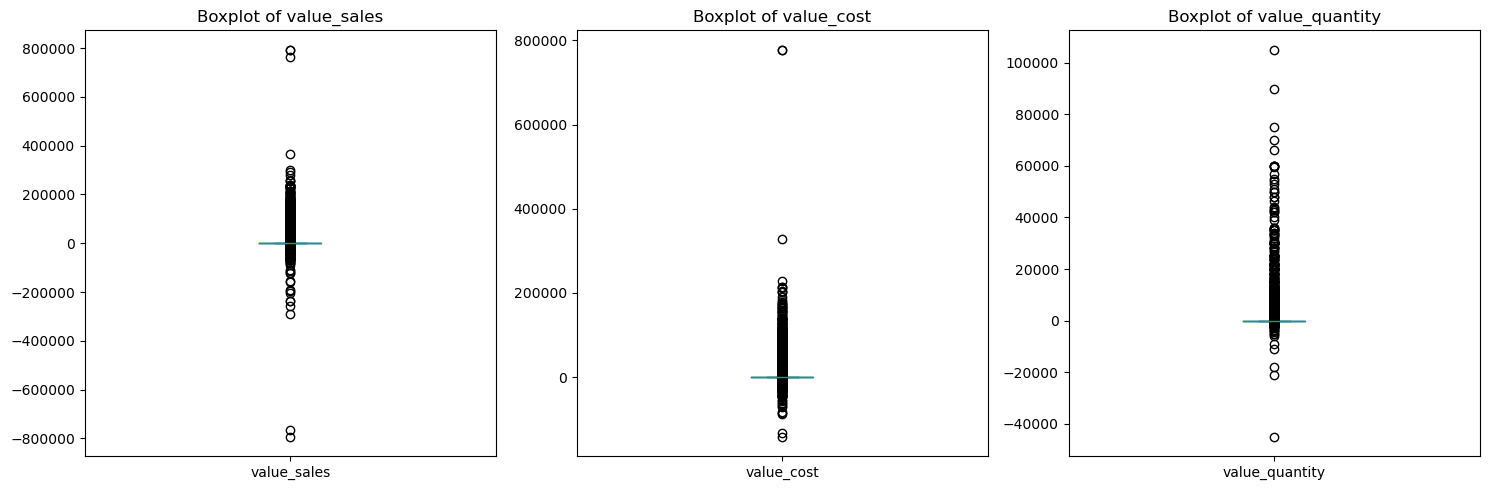

In [160]:
import matplotlib.pyplot as plt

# Set up the figure with a grid of 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the box plot for 'value_sales' in the first subplot
merged_data['value_sales'].plot(kind='box', ax=axes[0])
axes[0].set_title('Boxplot of value_sales')

# Plot the box plot for 'value_cost' in the second subplot
merged_data['value_cost'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot of value_cost')

# Plot the box plot for 'value_quantity' in the third subplot
merged_data['value_quantity'].plot(kind='box', ax=axes[2])
axes[2].set_title('Boxplot of value_quantity')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [162]:
# For value_sales
Q1_sales = merged_data['value_sales'].quantile(0.25)
Q3_sales = merged_data['value_sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales
print("Bounds for value_sales:", lower_bound_sales, "-", upper_bound_sales)

# For value_cost
Q1_cost = merged_data['value_cost'].quantile(0.25)
Q3_cost = merged_data['value_cost'].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost
lower_bound_cost = Q1_cost - 1.5 * IQR_cost
upper_bound_cost = Q3_cost + 1.5 * IQR_cost
print("Bounds for value_cost:", lower_bound_cost, "-", upper_bound_cost)

# For value_quantity
Q1_quantity = merged_data['value_quantity'].quantile(0.25)
Q3_quantity = merged_data['value_quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity
print("Bounds for value_quantity:", lower_bound_quantity, "-", upper_bound_quantity)


Bounds for value_sales: -238.89999999999998 - 459.5
Bounds for value_cost: -129.4125 - 240.7035
Bounds for value_quantity: -25.0 - 47.0


In [168]:
# Filter outliers for each column
sales_outliers = merged_data[(merged_data['value_sales'] < lower_bound_sales) | (merged_data['value_sales'] > upper_bound_sales)]
cost_outliers = merged_data[(merged_data['value_cost'] < lower_bound_cost) | (merged_data['value_cost'] > upper_bound_cost)]
quantity_outliers = merged_data[(merged_data['value_quantity'] < lower_bound_quantity) | (merged_data['value_quantity'] > upper_bound_quantity)]

# Display only the outliers for each column
print("Sales Outliers:\n", sales_outliers[['value_sales']])
print("Cost Outliers:\n", cost_outliers[['value_cost']])
print("Quantity Outliers:\n", quantity_outliers[['value_quantity']])


Sales Outliers:
          value_sales
13           3992.00
17           1222.08
36            536.00
67           3840.00
140          1396.62
...              ...
1988364       531.00
1988365       708.00
1988367       708.00
1988370       708.00
1988378      1185.00

[273923 rows x 1 columns]
Cost Outliers:
          value_cost
13        2098.7600
17         814.6176
36         339.4240
63         292.7532
67        2098.7600
...             ...
1988364    308.8848
1988365    411.8464
1988367    411.8464
1988370    410.2632
1988378    681.4500

[283555 rows x 1 columns]
Quantity Outliers:
          value_quantity
0                  84.0
17                384.0
36                160.0
40                 90.0
63                138.0
...                 ...
1988286            71.0
1988301           200.0
1988306           108.0
1988344            50.0
1988348            70.0

[201113 rows x 1 columns]


Setting thresholds 500,000 for value_sales, 600,000 for value_cost, and 50,000 for value_quantity helps us identify unusually large or small transactions based on what could be considered reasonable or typical in a business context.
By defining these limits, you can filter out transactions that might represent rare, high-impact events or possible data errors.

Using 500,000 for value_sales, 600,000 for value_cost, and 50,000 for value_quantity is a starting point based on:

- Visual Analysis of Box Plots: The plots indicated values around these thresholds as extremes.
- Business Logic: These numbers reflect what could be a reasonable upper limit for most cases, while anything beyond might be rare and worth investigating.

In [176]:
# Hypothetical business thresholds (modify based on real business knowledge)
sales_threshold = 500000
cost_threshold = 600000
quantity_threshold = 50000


# Filter based on business-defined thresholds
business_sales_outliers = merged_data[(merged_data['value_sales'] > sales_threshold) | (merged_data['value_sales'] < -sales_threshold)]
business_cost_outliers = merged_data[(merged_data['value_cost'] > cost_threshold) | (merged_data['value_cost'] < -cost_threshold)]
business_quantity_outliers = merged_data[(merged_data['value_quantity'] > quantity_threshold) | (merged_data['value_quantity'] < -quantity_threshold)]

# Display only the outlier values for each column

print("Business Sales Outliers:\n", business_sales_outliers[['value_sales']])
print("Business Cost Outliers:\n", business_cost_outliers[['value_cost']])
print("Business Quantity Outliers:\n", business_quantity_outliers[['value_quantity']])


Business Sales Outliers:
          value_sales
51580     -765100.00
51768      765100.00
1858931    793541.98
1860865   -793541.98
1860866    793541.98
Business Cost Outliers:
          value_cost
1858931    777669.2
1860866    777669.2
Business Quantity Outliers:
          value_quantity
27351           57000.0
30297           66000.0
1005677         60000.0
1005684         60000.0
1005689         60000.0
1009189         60000.0
1485743         55000.0
1528007         54000.0
1661053         51000.0
1683043         89650.0
1808060         70000.0
1820001         53000.0
1910302        105000.0
1910305         75000.0
1959440         59570.0


- Remove extreme outliers based on business-defined limits.
- Focus the analysis on values that fall within a "reasonable" range, reducing the influence of extremely high or low values that might skew results.

In [185]:
merged_data = merged_data[
    (merged_data['value_sales'] <= sales_threshold) & (merged_data['value_sales'] >= -sales_threshold) &
    (merged_data['value_cost'] <= cost_threshold) & (merged_data['value_cost'] >= -cost_threshold) &
    (merged_data['value_quantity'] <= quantity_threshold) & (merged_data['value_quantity'] >= -quantity_threshold)
]

- Boxplot of value_sales, value_cost, value_quantity after remove extreme outliers

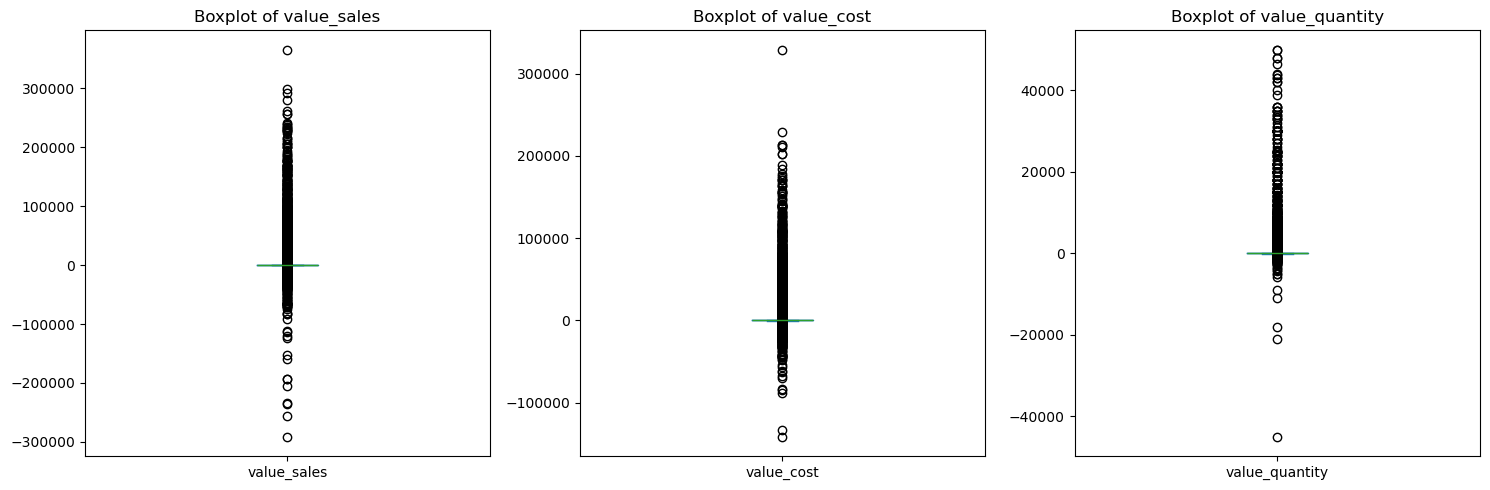

In [187]:
# Set up the figure with a grid of 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the box plot for 'value_sales' in the first subplot
merged_data['value_sales'].plot(kind='box', ax=axes[0])
axes[0].set_title('Boxplot of value_sales')

# Plot the box plot for 'value_cost' in the second subplot
merged_data['value_cost'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot of value_cost')

# Plot the box plot for 'value_quantity' in the third subplot
merged_data['value_quantity'].plot(kind='box', ax=axes[2])
axes[2].set_title('Boxplot of value_quantity')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


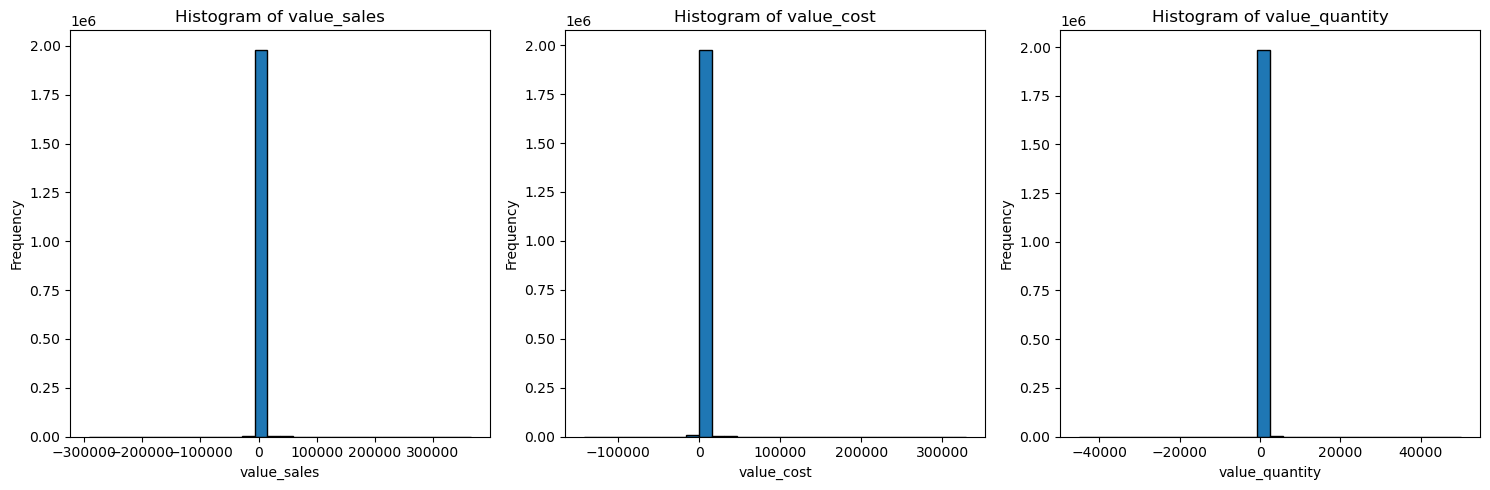

In [211]:
# Plot histograms for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for value_sales
axes[0].hist(merged_data['value_sales'], bins=30, edgecolor='black')
axes[0].set_title('Histogram of value_sales')
axes[0].set_xlabel('value_sales')
axes[0].set_ylabel('Frequency')

# Histogram for value_cost
axes[1].hist(merged_data['value_cost'], bins=30, edgecolor='black')
axes[1].set_title('Histogram of value_cost')
axes[1].set_xlabel('value_cost')
axes[1].set_ylabel('Frequency')

# Histogram for value_quantity
axes[2].hist(merged_data['value_quantity'], bins=30, edgecolor='black')
axes[2].set_title('Histogram of value_quantity')
axes[2].set_xlabel('value_quantity')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Highly Skewed Data:
The data for each of these columns is highly skewed, meaning there are many low or zero values and only a few high values.
This often occurs when there is a large number of small transactions (or even no transactions in some cases), and only a few large transactions.
2. Sparse Distribution:
The narrow and high central bars suggest that the vast majority of values are very close to zero, with few values spreading out across the range.
This could indicate that only a small percentage of transactions have high value_sales, value_cost, or value_quantity.
3. Potential Need for Transformation:
Because of the skewness, the data may benefit from a log transformation or another method to spread the values more evenly, especially if you plan to perform analyses or modeling that assume normality.
4. Zero or Minimal Transactions:
If there are many transactions with zero or minimal values in these columns, it might be useful to analyze these zero-value transactions separately. This could be a sign of canceled orders, unpaid invoices, or other business cases where no significant sales, cost, or quantity were recorded.

- Count zero values in each column

In [219]:
# Count zero values in each column
zero_value_sales = (merged_data['value_sales'] == 0).sum()
zero_value_cost = (merged_data['value_cost'] == 0).sum()
zero_value_quantity = (merged_data['value_quantity'] == 0).sum()

# Display the counts
print("Number of zero values in value_sales:", zero_value_sales)
print("Number of zero values in value_cost:", zero_value_cost)
print("Number of zero values in value_quantity:", zero_value_quantity)


Number of zero values in value_sales: 22241
Number of zero values in value_cost: 50110
Number of zero values in value_quantity: 48551


## 5. Data Type Conversion
- Ensure that each column has the appropriate data type (e.g., numeric, categorical, datetime).
- Convert data types if needed (e.g., parsing date strings into datetime objects).

In [221]:
# Check data types of each column
print(merged_data.dtypes)

accounting_date             datetime64[ns]
fiscal_year                          int64
fiscal_month                         int64
calendar_year                        int64
calendar_month                       int64
calendar_day                         int64
company_code                         int64
customer_code                       object
customer_district_code               int64
item_code                           object
business_area_code                  object
item_group_code                     object
item_class_code                     object
item_type                            int64
bonus_group_code                    object
environment_group_code              object
technology_group_code               object
commission_group_code               object
reporting_classification            object
light_source                        object
warehouse_code                      object
abc_class_code                      object
abc_class_volume                    object
business_ch

## 6. Normalization and Scaling
- Normalization: Rescale numerical data to fit within a particular range, often [0, 1].
- Standardization: Adjust the data to have a mean of zero and a standard deviation of one, which is important for certain machine learning 

## 7. Handling Categorical Variables
- Convert categorical variables to numeric form if required for analysis (e.g., one-hot encoding).
- Combine similar categories to reduce complexity (e.g., grouping rare categories together).

## 8. Feature Engineering
- Creating New Features: Generate new variables based on existing ones to capture additional insights.
- Dropping Irrelevant Features: Remove features that do not add value or are highly correlated, to avoid multicollinearity.

## 9. Text Cleaning (for Textual Data)
- For textual data, cleaning involves removing punctuation, converting to lowercase, removing stopwords, and stemming or lemmatizing words to bring them to their root form.